In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:

(trainX, trainy),(testX,testy) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainX.shape, trainy.shape)) 
print('Test: X = {}, y = {}'.format(testX.shape, testy.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [3]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
img_shape= trainX.shape[1:]
img_shape

(28, 28)

In [5]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

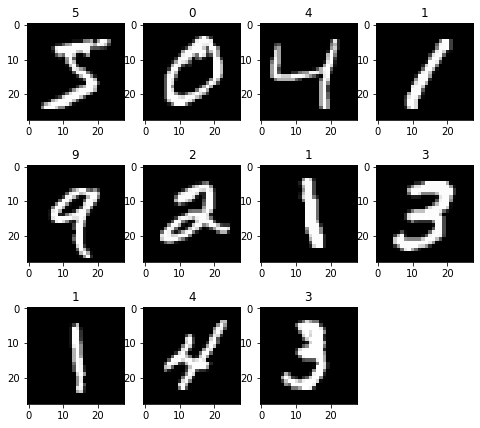

In [6]:
plt.figure(figsize= (8,10))
for i in range(11):
	plt.subplot(4,4,i+1)
	plt.imshow(trainX[i], cmap='gray')
	plt.title(trainy[i])
plt.show()

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters= 48,kernel_size=3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units = 500,activation= 'relu'))

model.add(tf.keras.layers.Dense(units = 10,activation= 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
x =  model.fit(trainX, trainy, epochs= 10, batch_size=128, verbose=2,validation_split=0.1)
# model.fit(trainX,validation_data= testy, epochs=25)

Epoch 1/10
422/422 - 7s - loss: 0.2486 - accuracy: 0.9229 - val_loss: 0.0566 - val_accuracy: 0.9842 - 7s/epoch - 17ms/step
Epoch 2/10
422/422 - 3s - loss: 0.0831 - accuracy: 0.9740 - val_loss: 0.0418 - val_accuracy: 0.9885 - 3s/epoch - 6ms/step
Epoch 3/10
422/422 - 2s - loss: 0.0612 - accuracy: 0.9801 - val_loss: 0.0368 - val_accuracy: 0.9903 - 2s/epoch - 5ms/step
Epoch 4/10
422/422 - 2s - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0347 - val_accuracy: 0.9898 - 2s/epoch - 4ms/step
Epoch 5/10
422/422 - 2s - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.0307 - val_accuracy: 0.9925 - 2s/epoch - 4ms/step
Epoch 6/10
422/422 - 2s - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0260 - val_accuracy: 0.9933 - 2s/epoch - 4ms/step
Epoch 7/10
422/422 - 2s - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0300 - val_accuracy: 0.9918 - 2s/epoch - 4ms/step
Epoch 8/10
422/422 - 2s - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0266 - val_accuracy: 0.9928 - 2s/epoch - 4ms/step
Epoch 9/10
422/422 - 2s

In [11]:
def define_model():  
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (28,28,1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 48,kernel_size=3, activation = 'relu'))
  model.add(tf.keras.layers.MaxPool2D((2,2)))

  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(units = 500,activation= 'relu'))

  model.add(tf.keras.layers.Dense(units = 10,activation= 'softmax'))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model

In [12]:
from sklearn.model_selection import KFold


def eval_data(x , y , n_k=5):
  score =[]
  hist = []

  kf = KFold(n_splits=n_k,shuffle = True, random_state=1)

  for train_kx, test_kx in kf.split(x):
    model = define_model()
    trainX, trainY, testX, testY = x[train_kx],y[train_kx],x[test_kx],y[test_kx]
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)
		# evaluate model
    acc = model.evaluate(testX, testY, verbose=2)
    acc = np.array(acc)
    print('Accuracy is %.3f' % (acc.max() * 100))
		
    score.append(acc)
    hist.append(history)

In [ ]:
eval_data(trainX,trainy,5)

Epoch 1/10
1500/1500 - 6s - loss: 0.1831 - accuracy: 0.9416 - val_loss: 0.0652 - val_accuracy: 0.9805 - 6s/epoch - 4ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.0721 - accuracy: 0.9769 - val_loss: 0.0464 - val_accuracy: 0.9862 - 4s/epoch - 3ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.0435 - val_accuracy: 0.9864 - 4s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0404 - val_accuracy: 0.9868 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 5s - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0346 - val_accuracy: 0.9892 - 5s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 5s - loss: 0.0348 - accuracy: 0.9882 - val_loss: 0.0381 - val_accuracy: 0.9892 - 5s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 5s - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0357 - val_accuracy: 0.9902 - 5s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 5s - loss: 0.0277 - accuracy: 0.9905 - val_loss: 0.0353 - val_accuracy: 0.9898 - 5s/epoch - 3ms/step
Epoch 9/

In [ ]:
loss , accuracy = model.evaluate(testX, testy)

In [ ]:
nums=[]
for i in range(0,5):
  x = np.random.randint(0,len(testX))
  nums.append(x)

for num in nums:  
  plt.imshow(testX[num])
  pred= model.predict(testX)
  plt.show()
  print("Model Prediction is:",np.argmax(pred[num]))
  print()
  print('#'*40)